<a href="https://colab.research.google.com/github/drpetros11111/DeepUnderstanding_DL/blob/ANN_Linear-Regression_pytorch-%26-tf/DUDL_ANN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

# Importing the Libraries in pyTorch

In [1]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Importing the Libraries in Tensorflow

In [2]:
# import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# ensure high-quality vector graphics for plots
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


# Check the Tensorflow version

In [6]:
import tensorflow as tf
print(tf.__version__)


2.17.0


# Create and Plot Random Data in pyTorch

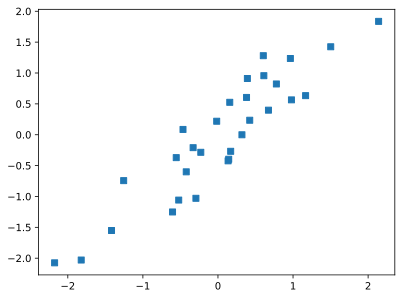

In [3]:
# create data

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

# Create and Plot Random Data in Tensorflow

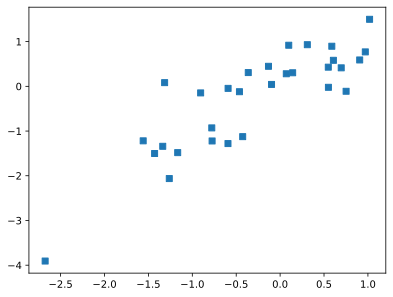

In [5]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# create data
N = 30
x = tf.random.normal([N, 1])  # TensorFlow's version of torch.randn
y = x + tf.random.normal([N, 1]) / 2  # Similar random data with noise
# plot the data
plt.plot(x.numpy(), y.numpy(), 's')

# Explanation of the Tensorflow creation of random data from a Normal Distribbution

---------------------------
##Create the x data
    tf.random.normal([N, 1]):

This creates a tensor x with shape [N, 1], where N is the number of data points.

The values in this tensor are drawn from a normal distribution (Gaussian distribution) with a mean of 0 and a standard deviation of 1.

In this context, x represents some random input data generated using a normal distribution, similar to torch.randn(N, 1) in PyTorch.

-----------------------------
##Introduce Random Noise in the y data

    y = x + tf.random.normal([N, 1]) / 2:

This creates a tensor y by adding random noise to x.

A second random tensor is generated using tf.random.normal([N, 1]) (again drawn from a normal distribution).

This random noise is divided by 2, which reduces the variance of the noise (makes it smaller).

The noise is then added to x, resulting in y being a noisy version of x.

y represents the output data, where each value is approximately the same as x with added random noise.
In summary:

x is a tensor with normally distributed random values (simulating input data).

y is the same tensor x with added random noise, simulating noisy output data.

---------------------
##Why divide by 2?
By dividing the random values by 2, the amplitude of the noise is scaled down.

This makes the noise less dominant compared to the original data (x), resulting in less variance in the values of y.

The variance of the normal distribution is reduced from 1 to 1/4 (since variance scales by the square of the divisor).

##Impact:
Without the division, the noise might be too large, leading to values in y that deviate significantly from x.

With the division, the noise is more subtle, making the resulting y values closer to x, but still noisy.

This is often done in simulations or training data generation when you want to model a situation where data is somewhat noisy, but not overwhelmingly so.

--------------------------
##Why the variance gets smaller by 1/4 when you divide the random noise by 2
Let me break down the idea of how the variance of a normal distribution changes when the data is scaled by a constant, like in this example:

##Background on Normal Distribution:
A normal distribution has two key parameters:

Mean: The center or average value.

Variance: A measure of how spread out the values are around the mean.

For a standard normal distribution (like the one generated by tf.random.normal()), the mean is 0 and the variance is 1.

##Scaling and Variance:
When you multiply a random variable by a constant, the variance of the resulting values changes as well. Specifically:

If you scale a random variable
𝑋 by a constant 𝑐 i.e.,
$$cX$$

the variance of the scaled variable
$$𝑐
𝑋$$
cX is scaled by the square of
$$𝑐^2$$

Therefore

$$Var(cX)=c^2⋅Var(X)$$

Applying This to Your Example:
In the equation:

    y = x + tf.random.normal([N, 1]) / 2

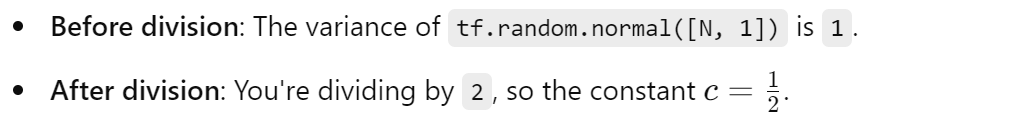

Now, using the rule above:


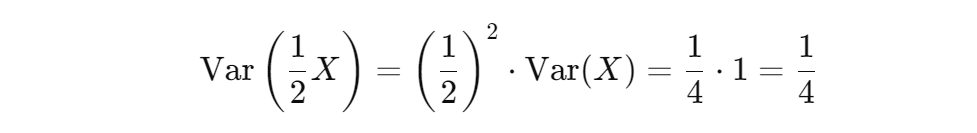

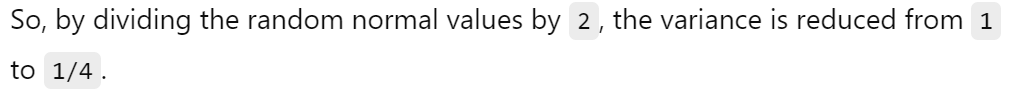


So, by dividing the random normal values by 2, the variance is reduced from 1 to 1/4.

------------------------
##Why Does the Variance Change?
Variance measures the spread of the data.

When you scale down the noise by dividing it by 2, the spread of the noise also shrinks by a factor of 4.

This means the noise has smaller fluctuations around 0, and thus it doesn't deviate as much from the original values of x.

--------------------------
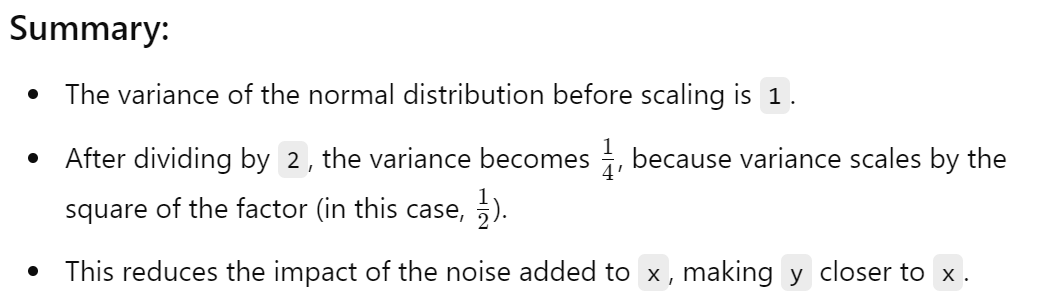

----------------------------
#Note:
he mean is 0.
The variance is 1.
The standard deviation is also 1.
Here's how they relate:

Variance is a measure of how spread out the values are, and it is the square of the standard deviation:
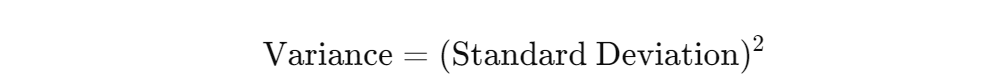


So, when we say the variance is 1 in a standard normal distribution, the standard deviation is actually the square root of 1, which is also 1:

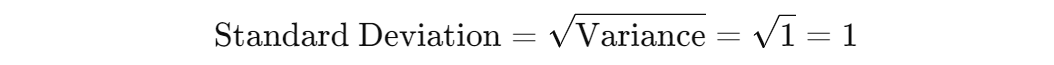


##In summary:
Variance = 1 (which means the standard deviation = 1).
When scaling by a factor (e.g., dividing by 2), both the variance and standard deviation are affected, but the relationship between them remains the same (variance scales by the square of the factor).


In [ ]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

ANNreg

In [ ]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [ ]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)


## Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [ ]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [ ]:
testloss.item()

In [ ]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Additional explorations

In [ ]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets.
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
#
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
#
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.